INTRODUCCIÓN
==========================================

Regresión logística con pytorch sobre el dataset Heart Failure Clinical Records (2020). <br>
Fuente: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

CONJUNTO DE DATOS
==========================================

Los datos son reales y provienen de un hospital sin mencionar. Contiene 5000 filas de pacientes que sufrieron un accidente cardiovascular y posteriormente un monitoreo durante un tiempo determinado.

Columnas:

| Nombre | Tipo dato | Descripción | Unidad |
| --- | --- | --- | --- |
| Age | Integer | Edad | Años |
| Anaemia | Binary | Disminución en hemoglobina | - |
| Creatinine_phosphokinase | Integer | Nivel encima CPK en sangre | mcg/L |
| Diabetes | Binary | Tiene diabetes ? | - |
| Ejection_fraction | Integer | Porcentaje de sangre en cada contracción | % 
| High_blood_pressure | Binary | Tiene hipertensión ? | - |
| Platelets | Float | Plaquetas en sangre | kiloplatelets/mL |
| Serum_creatinine | Float | Nivel de creatinina en sangre | mg/dL |
| Serum_sodium | Integer | Nivel de sodio en sangre | mEq/L |
| Sex | Binary | Mujer (0) u hombre (1) | - |
| Smoking | Binary | Fuma ? | - |
| Time | Integer | Seguimiento | dias |
| Death_event | Binary | Fallecimiento | - |


CONCEPTOS BÁSICOS
==========================================

Para entender mejor de qué va el trabajo es necesario conocer antes una serie de conceptos sobre los recursos y otras herramientas usadas:
- <b>Redes neuronales</b>: Una red neuronal es un modelo computacional inspirado en el funcionamiento del cerebro humano. Está compuesta por un conjunto de nodos o "neuronas" interconectadas que procesan información. Aprenden a realizar tareas al considerar ejemplos, generalmente sin ser programadas con reglas específicas para la tarea.
- <b>Regresión logística</b>: Algoritmo de aprendizaje supervisado que se utiliza en la clasificación binaria, es decir, tareas donde la variable de salida puede tomar dos valores posibles (0 y 1, verdadero y falso, etc).
- <b>Pandas</b>: Biblioteca de Python que proporciona estructuras de datos y herramientas de análisis de datos flexibles y eficientes. Es fundamental para realizar tareas de manipulación de datos y limpieza.
- <b>Pytorch</b>: Es una biblioteca de aprendizaje automático de código abierto para Python, desarrollada principalmente por el grupo de investigación de inteligencia artificial de Facebook(Meta). Proporciona dos características de alto nivel: operaciones tensoriales con soporte para GPU y redes neuronales profundas construidas sobre un sistema de autograd (cálculo automático de gradientes) flexible.
- <b>Tensores</b>: Un tensor es una estructura de datos generalizada que es una extensión de matrices multidimensionales. En el contexto de PyTorch y otras bibliotecas de aprendizaje profundo, los tensores son la estructura de datos principal con la que se trabaja.
Los tensores son similares a los arrays de NumPy, pero también tienen soporte para GPU y otras características que los hacen adecuados para el cálculo de redes neuronales.
- <b>Función de perdida</b>: También conocida como función de coste, es una fórmula matemática que mide cuán bien el modelo está realizando su tarea, ya sea la clasificación, la regresión, etc. Las ha de varios tipos, según la naturaleza de los datos. Algunos ejemplos son BCELoss o MSELoss.
- <b>Optimizador</b>: Es un algoritmo o método que se utiliza para ajustar los parámetros de un modelo con el objetivo de minimizar la función de pérdida. Como la función de perdida también hay multitud y debemos buscar el más adecuado para nuestra carga de trabajo. Algunos ejemplos son Adam, adagrad, Rmsprop...
- <b>Train y test</b>: Sets (conjunto de datos) de entrenamiento y de validación (test). Para entrenar un modelo es necesario dividir nuestros datos en dos sets, uno de entrenamiento sobre el que realizaremos todo el trabajo y otro de test con el que comprobaremos la validad de los datos. Deben ser distintos.
- <b>Normalización de datos</b>: El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos a una escala común, sin distorsionar las diferencias en los rangos de valores o perder información.
- <b>Epoch</b>: Iteracciones de entrenamiento, ciclos. Debemos jugar con este parametro númerico y otros para poder entrenar nuestro módelo de forma óptima.
- <b>Tasa de aprendizaje</b>: Otro parametro de entrenamiento que define cuán rapido aprende nuestro modelo. Se usan valores del estilo 0.1, 0.01... También debemos probar bien ya que no siempre un valor más alto nos lleva a un entrenamiento más rapido y efectivo.
- <b>Backward pass</b>: Durante este paso, se calculan los gradientes de la función de pérdida con respecto a los parámetros del modelo (pesos y sesgos), utilizando un algoritmo llamado retropropagación.

IMÁGENES
=======================================
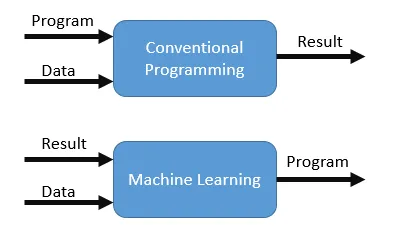 <br>
*Programación tradicional vs. Machine Learning*

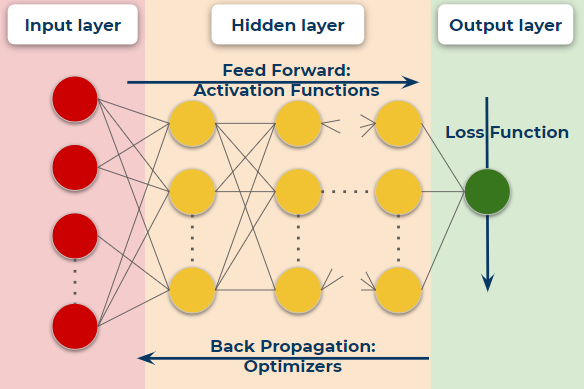 <br>
*Flujo de una red neuronal: Input -> Función Activación -> Output -> Backward pass*

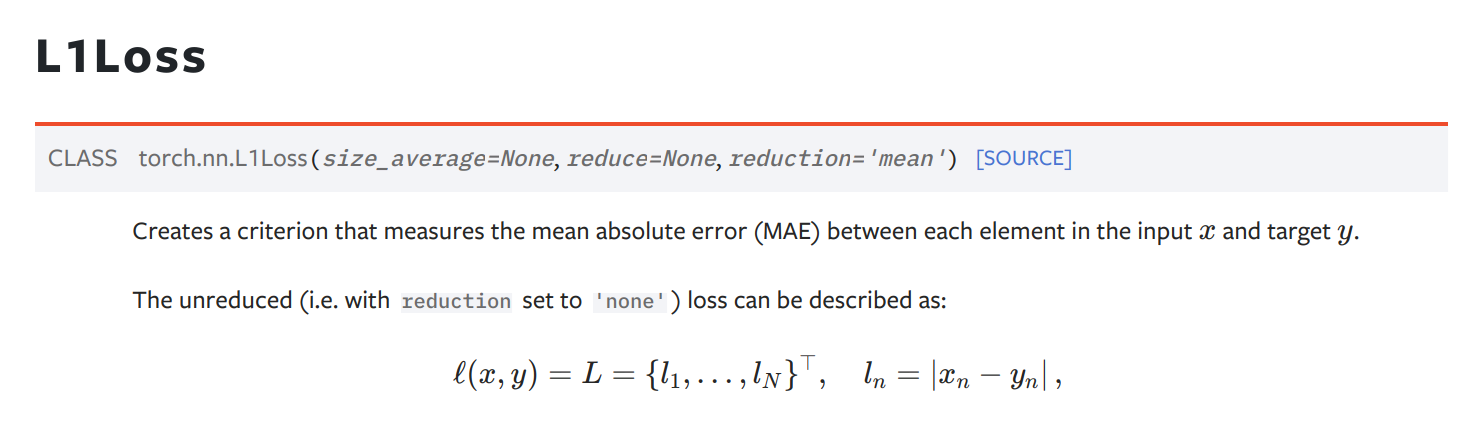 <br>
*Funcionamiento de la función de perdida L1Loss*

## Tratamiento de los datos

In [1]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Cargamos el dataset y mostramos las primeras filas
data = pd.read_csv('heart_failure.csv')
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

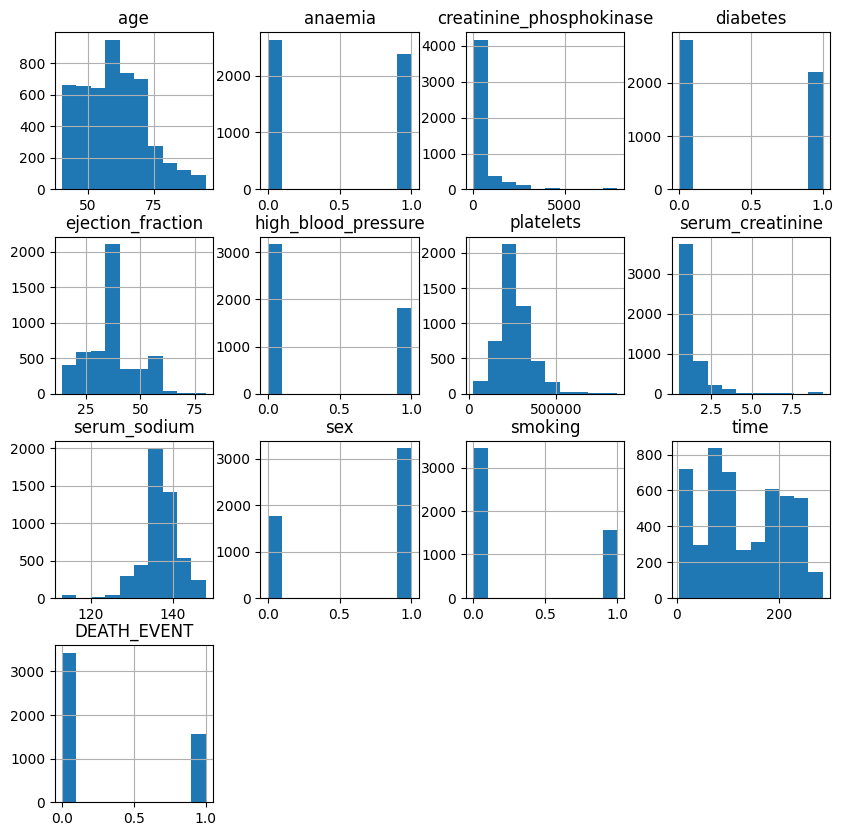

In [3]:
# Mostramos un gráfico de distribución de las distintas variables
data.hist(figsize = (10,10))
plt.show()

In [4]:
# Un pequeño resumen de los datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [6]:
# Buscamos datos atipicos
# Calculamos percentiles 25 y 75
q25 = data.quantile(0.25)
q75 = data.quantile(0.75)

# Calculamos el rango intercuartílico
iqr = q75 - q25

# Calculamos los límites inferior y superior
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Filtramos los datos atípicos. No hay.
outliers = data[(data < lower_bound) | (data > upper_bound)].count()
print(len(outliers))

13
